## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import missingno
%matplotlib inline

## Importing Datasets

In [2]:
df = pd.read_csv('./netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1. Data Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Missing Values')

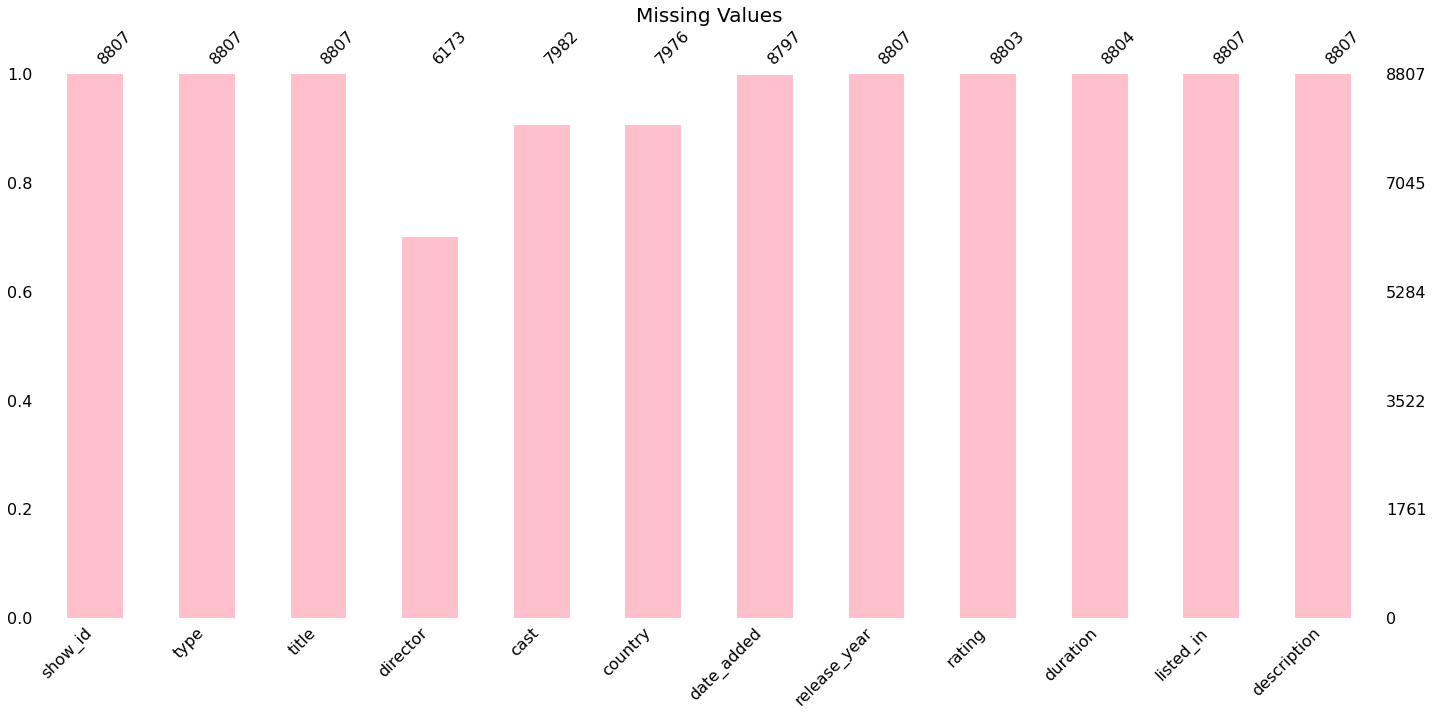

In [7]:
missingno.bar(df,color='pink')
plt.title('Missing Values',fontsize=20)

The dataset happens to have its on unique values. I'm going to index on that

In [8]:
df.set_index(df.show_id,drop=True,inplace=True)

In [9]:
df.drop(columns=['show_id'],axis=1,inplace=True)

In [10]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Inspecting the columns for discrepancies

In [11]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [12]:
len(df.title.unique())

8807

In [13]:
df[df.director.isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...
s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...


In [14]:
(df.director.isna().sum() / len(df))*100

29.908027705234474

The director column has a lot of null values (30% are null values). Since I'm not making use of the column, i can drop it

In [15]:
df.drop(columns=['director'],axis=1,inplace=True)

In [16]:
df[df.cast.isna()]

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
s15,TV Show,Crime Stories: India Detectives,NaN,NaN,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
...,...,...,...,...,...,...,...,...,...,...
s8747,Movie,Winnie,NaN,"France, Netherlands, South Africa, Finland","February 26, 2018",2017,TV-14,85 min,"Documentaries, International Movies",Winnie Mandela speaks about her extraordinary ...
s8756,TV Show,Women Behind Bars,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries",This reality series recounts true stories of w...
s8757,Movie,Woodstock,NaN,United States,"August 13, 2019",2019,TV-MA,97 min,"Documentaries, Music & Musicals",For the 50th anniversary of the legendary Wood...


825 of the data have Null Casts. It will be practically impossible to fill in the missing values. So i would just drop it

In [17]:
df.drop(columns='cast',axis=1,inplace=True)

The country column has some missing values. Insteading of the droping the column, I will fill the NaN spaces with the Mode of 
the country column

In [18]:
df.country.fillna(df.country.mode()[0],inplace=True)

In [19]:
df.isna().sum()

type             0
title            0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

Since the missing rows are not much, I can afford to drop rows with null values

In [20]:
df.dropna(subset=['date_added'],inplace=True)

In [21]:
df.dropna(subset=['rating'],inplace=True)

In [22]:
df.dropna(subset=['duration'],inplace=True)

In [23]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Conclusion: All the columns in the dataframe have been dropped or filled

In [24]:
df.duplicated().sum()

0

Hence there are 0 duplicated in the dataframe

## 2. Data Cleaning and Manipulation

In [25]:
df['date_added']

show_id
s1       September 25, 2021
s2       September 24, 2021
s3       September 24, 2021
s4       September 24, 2021
s5       September 24, 2021
                ...        
s8803     November 20, 2019
s8804          July 1, 2019
s8805      November 1, 2019
s8806      January 11, 2020
s8807         March 2, 2019
Name: date_added, Length: 8790, dtype: object

In [26]:
df.date_added = pd.to_datetime(df.date_added)

In [27]:
df['Year_added'] = df['date_added'].dt.year

In [28]:
df['Month_added'] = df['date_added'].dt.month_name()

From the 'ratings' column, there seems to be some duplicate but different units of measurement

In [29]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [30]:
ratings_map = {
    'PG-13':'Teens', 'TV-MA':'Adults', 'PG':'Older Kids', 'TV-14':'Teens', 'TV-PG':'Older Kids', 'TV-Y':'Kids', 'TV-Y7':'Older Kids', 'R':'Adults',
       'TV-G':'Kids', 'G':'Kids', 'NC-17':'Adults', 'NR':'Adults', 'TV-Y7-FV':'Older Kids', 'UR':'Adults'
}

In [31]:
df['rating'].replace(ratings_map,inplace=True)

Now we have just four categories of rating

In [32]:
df['rating'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

We can split the current dataframe into two separate dataframes. 1. Movies 2. Series

In [33]:
movie_df = df[df['type']=='TV Show'].copy();

In [34]:
tv_df = df[df['type']=='Movie'].copy();

In [35]:
movie_df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added
show_id,,,,,,,,,,,
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
s3,TV Show,Ganglands,United States,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
s5,TV Show,Kota Factory,India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September
s6,TV Show,Midnight Mass,United States,2021-09-24,2021,Adults,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,September


## Data Visualization

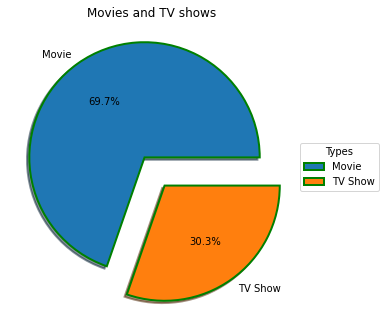

In [36]:
x = df['type'].value_counts()
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_axes([0.1,0.1,1,1])
ax1.set_title('Movies and TV shows')
wedges, texts,temp = ax1.pie(x,labels=x.index,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'green'},explode=[0.1,0.2])
ax1.legend(wedges, x.index,
          title ="Types",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

In [37]:
df['country_main'] = df['country'].apply(lambda x: x.split(',')[0])

In [38]:
country_df = df['country_main'].value_counts().reset_index()

In [39]:
country_df

,index,country_main
0,United States,4031
1,India,1008
2,United Kingdom,627
3,Canada,271
4,Japan,257
...,...,...
81,Namibia,1
82,Senegal,1
83,Luxembourg,1
84,Syria,1


In [40]:
country_df = country_df[(country_df['country_main'] / country_df['country_main'].sum()) > 0.01]

In [41]:
country_df

,index,country_main
0,United States,4031
1,India,1008
2,United Kingdom,627
3,Canada,271
4,Japan,257
5,France,212
6,South Korea,211
7,Spain,181
8,Mexico,134
9,Australia,115


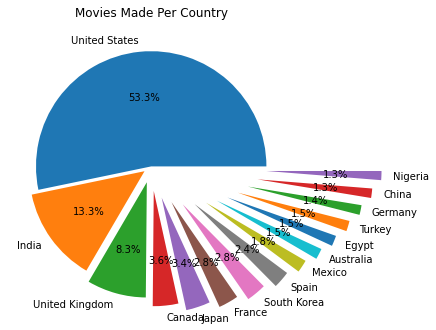

In [42]:
fig = plt.figure(figsize=(9,4))
ax1 = fig.add_axes([0.1,0.1,1,1])

ax1.set_title('Movies Made Per Country')
ax1.pie(x=country_df['country_main'],autopct='%1.1f%%',labels=country_df['index'],explode=np.linspace(0,1,15));

Conclusion: After dividing the Pie Chart above based on movies produced by contry, We see that over 50% of the movies were made in the united states

In [43]:
df_year_month = df.pivot_table(values='title',columns=['Year_added'],index=['Month_added'],aggfunc='count').fillna(0)


In [44]:
df_year_month

Year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month_added,,,,,,,,,,,,,,
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,92.0,115.0,162.0,177.0,188.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,33.0,115.0,164.0,131.0,129.0,178.0
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,21.0,95.0,118.0,185.0,215.0,169.0,0.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,15.0,82.0,86.0,148.0,114.0,109.0
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,43.0,71.0,129.0,153.0,205.0,132.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,79.0,152.0,157.0,146.0,257.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,18.0,94.0,78.0,168.0,156.0,207.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,17.0,124.0,173.0,172.0,137.0,112.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,13.0,86.0,97.0,139.0,157.0,132.0


<AxesSubplot:xlabel='Year_added', ylabel='Month_added'>

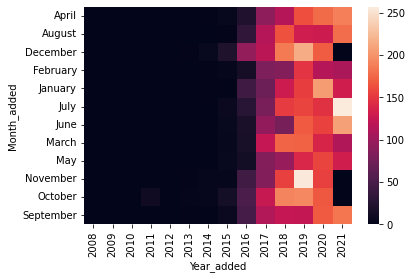

In [45]:
sns.heatmap(df_year_month)

Conclusion: From the heatmap above, we can see that movie production has been on the increase since 2008

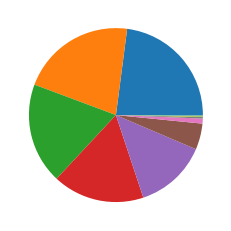

In [67]:
plt.pie(df.Year_added.value_counts());

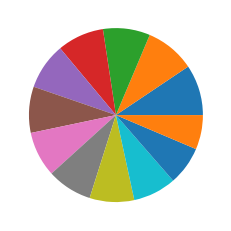

In [69]:
plt.pie(df.Month_added.value_counts());

In [73]:
tv_df['Month_added'].value_counts()

July         565
April        549
December     547
January      545
October      545
March        528
September    518
August       518
November     498
June         492
May          439
February     382
Name: Month_added, dtype: int64

In [47]:
with pd.option_context('display.max_rows', None):
    display(df.groupby([df.date_added.dt.year,df.date_added.dt.month_name()])['title'].count())

date_added  date_added
2008        February        1
            January         1
2009        May             1
            November        1
2010        November        1
2011        May             1
            October        11
            September       1
2012        December        1
            February        1
            November        1
2013        August          1
            December        2
            March           1
            November        2
            October         3
            September       2
2014        April           2
            August          1
            December        6
            February        2
            January         2
            July            1
            June            1
            November        4
            October         4
            September       1
2015        April           5
            August          2
            December       21
            February        4
            January         1
            July 

Are more movies being made for younger adults?

<AxesSubplot:xlabel='rating'>

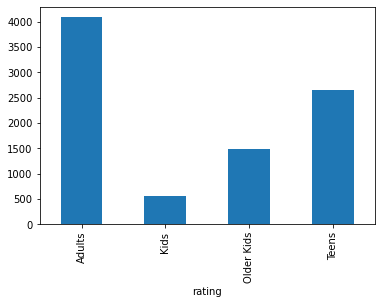

In [81]:
df.groupby(by='rating')['title'].count().plot(kind='bar')

Conclusion: From the bar chart, adult movies seem to produced more than movies for kids, older kids and teens

But the overall movies are not enough. I'm now going to see how movies are made between the years 2020 and 2021

In [85]:
# Enough data to work with
df_2020 = df[df['Year_added']>2020]
len(df_2020)

1498

<AxesSubplot:xlabel='rating'>

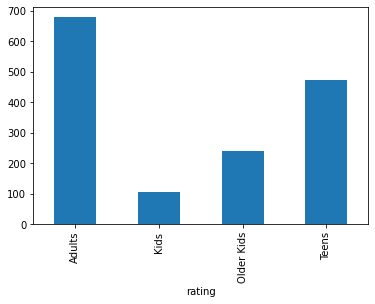

In [88]:
df_2020.groupby('rating')['title'].count().plot(kind='bar')

Conclusion: It appears that the movie distribution among ratings is a trend. This is because of the similarities in the bar charts

In [95]:
duration_df = df.groupby(by='duration').agg({'title':'count'})
duration_df.columns = ['count']
duration_df

,count
duration,
1 Season,1791
10 Seasons,6
10 min,1
100 min,108
101 min,116
...,...
95 min,137
96 min,130
97 min,146


<AxesSubplot:xlabel='duration'>

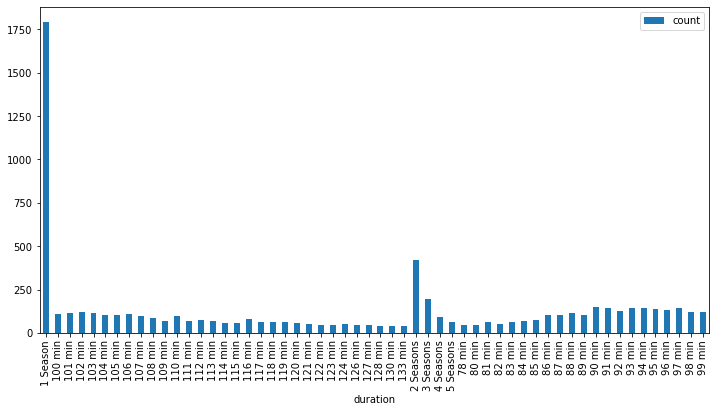

In [101]:
duration_df[duration_df['count'] > np.mean(duration_df['count'])].plot(kind='bar',figsize=(12,6))

In [ ]:
df['Year_added']

In [48]:
country_list = df.country.unique()

In [49]:
country_list

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

I want a list of all the countries and their occurence

In [50]:
country = set()

In [51]:
for i in country_list:
    try:
        temp_list = i.split(',')
        for j in temp_list:
            country.add(j)
    except AttributeError:
        continue
        
    

In [52]:
country.discard('')

In [53]:
new_country_list = []

In [54]:
for i in country:
    new_country_list.append(i.strip())

There are 196 countries involved with netflix in the past years

In [55]:
len(new_country_list)

196

In [56]:
country_count_map = {}

In [57]:
for country in new_country_list:
    count = 0
    for i in country_list:
        try:
            temp_list = i.split(',')
            for j in temp_list:
                if j.strip() == country:
                    count += 1
        except AttributeError:
            continue
    country_count_map[country] = count

In [58]:
country_count_map

{'Germany': 116,
 'Austria': 8,
 'South Africa': 27,
 'Slovenia': 3,
 'Puerto Rico': 1,
 'Botswana': 1,
 'Paraguay': 1,
 'Hungary': 8,
 'Cambodia': 6,
 'Namibia': 2,
 'Samoa': 1,
 'Jordan': 8,
 'Indonesia': 11,
 'Philippines': 9,
 'Ghana': 3,
 'Slovakia': 1,
 'Ukraine': 2,
 'Kenya': 4,
 'Greece': 7,
 'Georgia': 2,
 'Romania': 9,
 'United Arab Emirates': 20,
 'France': 177,
 'Brazil': 20,
 'Qatar': 10,
 'Uganda': 1,
 'Australia': 43,
 'Malawi': 1,
 'Nigeria': 7,
 'West Germany': 5,
 'Kuwait': 3,
 'Vatican City': 1,
 'United States': 359,
 'Turkey': 8,
 'Italy': 43,
 'Lebanon': 16,
 'Switzerland': 18,
 'Senegal': 3,
 'Singapore': 17,
 'Denmark': 34,
 'Belgium': 51,
 'Bahamas': 1,
 'Argentina': 25,
 'Burkina Faso': 1,
 'Latvia': 1,
 'Egypt': 9,
 'Mongolia': 1,
 'Netherlands': 30,
 'Croatia': 4,
 'India': 48,
 'Saudi Arabia': 6,
 'Iceland': 6,
 'Cuba': 1,
 'Israel': 14,
 'Finland': 11,
 'Cayman Islands': 2,
 'South Korea': 26,
 'Palestine': 1,
 'Luxembourg': 12,
 'Serbia': 6,
 'Thailand': 

In [59]:
country_count_df = pd.DataFrame({'count':country_count_map}).sort_values(ascending=False,by='count')
country_count_df.head()

,count
United States,359
United Kingdom,207
France,177
Canada,117
Germany,116


From our results, the countries with the most movies acted are United States and United Kingdom

We also have a date_added column which we can convert to a datetime for ease of work

In [60]:
pd.to_datetime(df.date_added)

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8803   2019-11-20
s8804   2019-07-01
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [61]:
df.date_added.min()

Timestamp('2008-01-01 00:00:00')

In [62]:
df[df.date_added.dt.year==2008]

,type,title,country,date_added,release_year,rating,duration,listed_in,description,Year_added,Month_added,country_main
show_id,,,,,,,,,,,,
s5958,Movie,To and From New York,United States,2008-01-01,2006,Adults,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008,January,United States
s6612,TV Show,Dinner for Five,United States,2008-02-04,2007,Adults,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008,February,United States


## Questions

- Who is the most popular actor?
- Which is made more, TV shows or Series?